# LAB 6 - Wide and Deep Neural Networks


   ### Eli Laird

## Introduction

In this lab, I will be analyzing Credit Risk for loans issued by Lending Club and predicting likelihood of loans defaulting. Lending Club is a peer-to-peer lending company that matches lenders to borrowers through the internet. I will use a Wide and Deep Neural Network to complete this prediction task and will also compare multiple versions of and Wide and Deep Network will a standard Multilayer Perceptron. 

## Business Understanding

##### Motivation

Credit risk models the probability of loss due to a borrower's failure to make payments on any type of debt. [1] Many banks and businesses will attempt to mitigate losses by observing the state of the institution's capital and loan reserves. This process of Credit Risk Management is carried out by thorough risk assessments which permit institutions to know if their capital reserves accurately reflect risks and if loan reserves cover short-term credit losses. These credit/loan reserves act as a backup in the case that the credit or loan defaults, meaning that the borrower fails to pay back the loan. In the case of a default, the institution uses these reserves to pay for the losses until the borrower finally pays the loan. When an institution fails to manage the risk of their assets, they will be under the influence that their reserves accurately cover all potential losses that could occur,when in reality their reserves fail to cover the losses and the institution loses capital.

To successfully manage risk it is important to use a risk assessment solution that can accurately identify risk. Since credit risk is the probability of a loan defaulting, our goal is to predict whether or not given loans are delinquent, meaning they have a high probability of defaulting. It is critical in managing risk to be able to identify loans that have high probabilities of defaulting. The ability to identify delinquent loans will assist institutions in appropriately preparing loan reserves to cover potential losses. Not only does one need a risk assessment solution to find potential risks, it is important for this solution to be scalable to an entire enterprise. Managing the risk of a small sector of an enterprise will leave risks in unmanaged sectors unchecked, thus increasing the likelihood of the enterprise acquiring losses. To summarize, our solution must accurately identify loans with a high likelihood of defaulting and also be able to apply to the enterprise level. 

##### Solution

To satisfy the previously stated requirements for a successful risk assessment solution, our solution design is a Wide and Deep Neural Network that will identify risks by classifying loans as either delinquent or secure. The Wide and Deep Neural Network architecture not only provides the capability to indentify credit risks, but also offers scalability. This scalability is provided by the combination of the Wide and Deep networks. The Wide network will be able to "memorize" specific occurences that rarely occur and do not generalize well.  For example, the Wide segment of the network would be able to learn that a loan with specific features such as being borrowed by a college student, without employment, and low annual income has a high likelihood of default. On the opposite side of the network the Deep segment is able complement the Wide network by generalizing well to the input data. This generalization will aid in scaling the solution to large enterprises. An enterprise can then use this solution to identify specific risks that may happen in certain sectors of the enterprise with the Wide network as well as identify risks that occur accross the board with the Deep network. 


##### Evaluation

In this scenario of risk management, we need our risk assessment solution to correctly classify all loans that are likely to default so that the institution can take preventative measures, such as augmenting the loan reserves, in order to cover the credit. This would correspond to having a low False Negative rate, meaning that we minimize the amount of defaults we fail to identify. If the solution fails to identify a loan that will default, the loan reserves will not cover the loan, thus resulting in a loss in capital by the institution. We also do not want our solution to classify more defaulting loans than there are in reality. This would correspond to having a low False Positive rate, meaning that we do not classify secure loans as defaulting loans. In the case where the False Positive rate is high, the institution will set aside redundant funds to cover the loan reserves that could otherwise be in use throughout the company. To address these necessities, we will use the F1 Score to evaluate our solution. The F1 score measures the balance between the precision and recall, where the precision puts emphasis on false positives and the recall puts emphasis on the false negatives. Since we want to have a balance between correctly identifying as many delinquent loans as possible and also not classifying too many as delinquent, the F1 score is our best choice to evaluate this model. The formula for calculating the F1 score is shown below.

$$
\begin{align}
F1 = 2*\frac{Precision*Recall}{Precision + Recall}
\end{align}
$$

where, 

$$ 
\begin{align} 
Precision = \frac{True Positive}{True Positive + False Positive}
\end{align}
$$

and,

$$
\begin{align}
Recall = \frac{True Postive}{True Positive + False Negative}
\end{align}
$$


## Data Preparation

In [88]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

loans = pd.read_csv('./data/loan.csv')


loans.head()

/Users/eli/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <center> Data Descriptions </center>
    
|Feature | Data Type | Description  |
|-------|---------------|----------|
|loan_amnt:| continuous| The listed amount of the loan applied for by the borrow|
|term:| 36 Months, 60 Months| The number of payments on the loan|
|int_rate:| continuous| The interest rate on the loan|
|grade:| A, B, C, D, E, F, G| Loan quality score based on borrower's credit history, quality of collateral, and likelihood of repayment|
|emp_length: | < 1 year, 1 year, 2 years,..., 10+ years| Employment length in years|
|home_ownership: | RENT, OWN, MORTGAGE, OTHER, NONE, ANY| The home ownership status provided by the borrower during registration|
|annual_inc: | continuous| The self-reported annual income provided by the borrower during registration|
|**loan_status**: | Delinquent, Secure| Current status of the loan|


----


### Exploratory Data Analysis 

In [89]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [90]:
features = ['loan_amnt','term','int_rate','grade',
            'emp_length', 'home_ownership','annual_inc','loan_status']

loans_data = loans[features]

loans_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status
0,5000.0,36 months,10.65,B,10+ years,RENT,24000.0,Fully Paid
1,2500.0,60 months,15.27,C,< 1 year,RENT,30000.0,Charged Off
2,2400.0,36 months,15.96,C,10+ years,RENT,12252.0,Fully Paid
3,10000.0,36 months,13.49,C,10+ years,RENT,49200.0,Fully Paid
4,3000.0,60 months,12.69,B,1 year,RENT,80000.0,Current


##### Observe unique values of target variable: 'loan_status'

In [92]:
print("Unique value count for 'loan_status' {}".format(loans_data['loan_status'].nunique()))
print("Unique values for 'loan_status' {}".format(loans_data['loan_status'].unique()))

Unique value count for 'loan_status' 10
Unique values for 'loan_status' ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']


In [93]:
loans_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

* We will be predicting loans as either delinquent or secure. Loans that are identified as 'Default', 'Charged off', or 'Late...' will identify loans that are risky. A loan that is 'charged off' is a loan that the lender has essentially given up on collecting. These charged off loans occur when a borrower is significantly behind on their payments and is very unlikely to pay back the loan. 'Late' and 'Default' loans are obvious occurences of a delinquent loan, meaning that are behind on payments or completely defaulted on the payments. 

In [94]:
loan_status = ['Default','Fully Paid','Charged Off','Late (31-120 days)', 'Late (16-30 days)']
loans_data = loans_data[loans_data['loan_status'].isin(loan_status)]

loans_data['loan_status'].value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

#### Observe unique values of feature variables

In [95]:
print("Unique 'grade' values: ", loans_data['grade'].unique())
print("Unique 'emp_length' values: ", loans_data['emp_length'].unique())
print("Unique 'home_ownership' values: ", loans_data['home_ownership'].unique())
print("Unique 'term' values: ", loans_data['term'].unique())

Unique 'grade' values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Unique 'emp_length' values:  ['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' nan]
Unique 'home_ownership' values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Unique 'term' values:  [' 36 months' ' 60 months']


#### Distributions of Categorical Variables

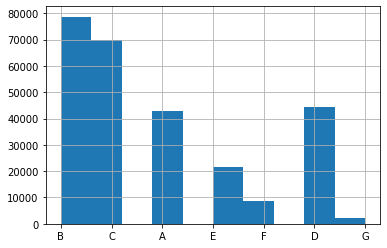

In [96]:
#plot distribution of grades
loans_data['grade'].hist()

>From the distribution above, we can see that nearly half of the loans graded as "B" or "C" loans, meaning that they are ranked farely well in regards to security. There is also a large amount of "D" rated loans. "D" rated loans are insecure and would be regarded as unsafe to manage. Inferring that the grade of the loan represents how "safe" it is to manage, the grade feature will be valuable in predicting defaulting loans.

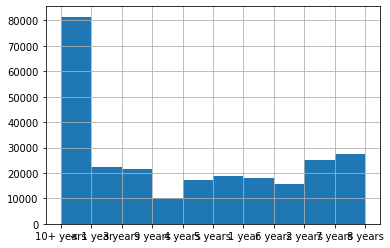

In [97]:
#plot distribution of emp_length
loans_data['emp_length'].hist()

>From the distribution of the years of employment for the borrowers of the loans, we can see that there is a mostly even distribution of employment except for the large amount of borrowers with more than 10 years of employment. This large spike for 10 or more years of employment is likely due to fact that when you observe the population as a whole, there are going to be more people with more than 10 years of employment than people with less. Therefore it makes sense that a large portion of this sample of borrowers have been employed more than 10 years. The more years employed offers valuable insight into whether the borrower will default based on the emprical evidence that more experience often leads to more success. 

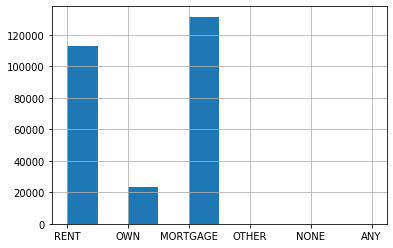

In [98]:
loans_data['home_ownership'].hist()

>The distribution above provides insight into how many borrowers currently rent, own, or mortgage their home. Most borrowers mortgage their home and the second most rent their home. Home ownership could be a valuable feature in predicting default. One hypothesis would state that borrowers that own their home are less likely to default because they were successful in paying of their home. While another hypothesis would indicate that borrowers that rent or mortgage their homes are likely to pay off their loans due to the experience of paying mortgage loans. There are many ways this variable can relate to defaulting, regardless, home ownership will provide insight into predicting defaulting loans. 

In [99]:
loans_data['home_ownership'].value_counts()

MORTGAGE    131462
RENT        112924
OWN          23567
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

#### Find and Remove NaNs


In [100]:
loans_data.isnull().sum()

loan_amnt             0
term                  0
int_rate              0
grade                 0
emp_length        10829
home_ownership        0
annual_inc            0
loan_status           0
dtype: int64

In [101]:
#remove nans
null_mask = loans_data[loans_data['emp_length'].isnull()].index
loans_data.drop(null_mask, inplace=True)
loans_data['emp_length'].isnull().sum()

0

There were only 10829 nan values in the dataset which in comparison to the large size of the dataset, around 200k instances, is miniscule. I also decided to remove the nan values because for the employment length feature, there is no valuable way to impute the values without introducing bias.


#### Encode Categorical Values and Scale Numeric Values

In [102]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257309 entries, 0 to 887369
Data columns (total 8 columns):
loan_amnt         257309 non-null float64
term              257309 non-null object
int_rate          257309 non-null float64
grade             257309 non-null object
emp_length        257309 non-null object
home_ownership    257309 non-null object
annual_inc        257309 non-null float64
loan_status       257309 non-null object
dtypes: float64(3), object(5)
memory usage: 17.7+ MB


In [103]:
loans_data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
5          Fully Paid
             ...     
887347     Fully Paid
887351    Charged Off
887364     Fully Paid
887366     Fully Paid
887369     Fully Paid
Name: loan_status, Length: 257309, dtype: object

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoders = dict()
cat_features = ['term','grade','emp_length','home_ownership']


#encode target variable
loan_status = {"loan_status": {"Default":1,"Charged Off":1, "Late (31-120 days)":1, "Late (16-30 days)":1, 
                                                                                         "Fully Paid": 0}}
loans_data.replace(loan_status, inplace=True)

#train categorical encoders
for col in cat_features:
    loans_data[col] = loans_data[col].str.strip()

    encoders[col] = LabelEncoder()
    loans_data[col+'_int'] = encoders[col].fit_transform(loans_data[col])
        
#scale numeric values
num_features = ['loan_amnt','int_rate','annual_inc']

for col in num_features:
    loans_data[col] = loans_data[col].astype(np.float)
    
    ss = StandardScaler()
    loans_data[col] = ss.fit_transform(loans_data[col].values.reshape(-1,1))
    

loans_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,term_int,grade_int,emp_length_int,home_ownership_int
0,-1.074965,36 months,-0.730741,B,10+ years,RENT,-0.839267,0,0,1,1,5
1,-1.380486,60 months,0.312407,C,< 1 year,RENT,-0.737406,1,1,2,10,5
2,-1.392707,36 months,0.468202,C,10+ years,RENT,-1.038711,0,0,2,1,5
3,-0.463923,36 months,-0.089498,C,10+ years,RENT,-0.411451,0,0,2,1,5
5,-1.074965,36 months,-1.351663,A,3 years,RENT,-0.635545,0,0,0,3,5


In [107]:
print("Percentage of Delinquent loans: ", len(loans_data[loans_data['loan_status'] == 1]) / len(loans_data))

Percentage of Delinquent loans:  0.22136030997749787


### Split into train and test sets

##### Splitting Technique

There is 8:2 ratio of secure loans to delinquent loans in this data set. This is common because, in practice, there are more secure loans than delinquent loans in reality. Because of the class imbalance in the data, we will want to make sure that each class is properly represented in both the training and testing sets. If we do not take the class imbalance into account, there is a chance that a class could be underrepresented in one of the test or training datasets, thus favoring one class over another in our model. To acknowledge this imbalance, we will use a Stratified  Split method to split our dataset into training and testing sets. We will use the Sklearn train_test_split method to achieve this split. The Stratified Split method will randomly split the data into training and testing sets while preserving the class ratios in each set. This method will make sure that the samples are more representative of the total population. Because the data set is relatively large, our train and test sets will be the results of a 80:20 split.
    

In [112]:
loans_data.describe()

,loan_amnt,int_rate,annual_inc,loan_status,term_int,grade_int,emp_length_int,home_ownership_int
count,2.573090e+05,2.573090e+05,2.573090e+05,257309.000000,257309.000000,257309.000000,257309.000000,257309.000000
mean,-2.039696e-14,6.802446e-15,4.518727e-15,0.221360,0.235849,1.842174,3.773914,2.947798
std,1.000002e+00,1.000002e+00,1.000002e+00,0.415163,0.424529,1.351029,3.177453,1.934391
min,-1.624903e+00,-1.934201e+00,-1.178804e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.633339e-01,-6.539727e-01,-4.827535e-01,0.000000,0.000000,1.000000,1.000000,1.000000
50%,-2.195065e-01,-5.111412e-02,-1.771701e-01,0.000000,0.000000,2.000000,3.000000,4.000000
75%,6.359524e-01,6.533499e-01,2.506466e-01,0.000000,0.000000,3.000000,6.000000,5.000000
max,2.591287e+00,3.410243e+00,1.465637e+02,1.000000,1.000000,6.000000,10.000000,5.000000


In [113]:
from sklearn.model_selection import train_test_split

loans_data_features = loans_data.loc[:, loans_data.columns != 'loan_status']
loans_target = loans_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(loans_data_features, loans_target, test_size=.20, random_state=1, stratify=loans_target)

print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (205847, 11)
X_test size:  (51462, 11)
y_train size:  (205847,)
y_test size:  (51462,)


In [116]:
#confirm that the stratify worked
y_train.value_counts()

0    160281
1     45566
Name: loan_status, dtype: int64

### Feature Cross-Products

In [119]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'term_int', 'grade_int',
       'emp_length_int', 'home_ownership_int'],
      dtype='object')

When working with categorial data it is common to combine features into feature cross-products that may be correlated with the target variable. We will use feature cross-products to help us in classifying delinquent loans. These cross-products will be used in the wide neural network in memorizing specific occurences in the data. The following feature cross-products will be used in our model:

#### <center>Cross-Products</center>

* **home_ownership-emp_length**
    - This product of the home ownership and employment length will be able to identify different types of borrowers, i.e. borrowers that are more likely to pay off the loan and borrows that are likely to have issues paying the loan. For example, a borrower who rents their home and has been employed for less than a year is likely to have just graduated college, with a lower income, and could also be paying off student debt. This borrower likely has a large amount of debt and will potentially have issues paying off their loans. On the other hand, a borrower who owns their home, and has been employed more than 10 years likely has a steady job and a large income. This borrower is likely to pay off their loans successfully.
    
* **grade-emp_length**
    - The product between the loan grade and the borrower's employment length will identify a relationship between the experience of the borrower and the relative safety of the loan. Loans that have a strong grade, i.e. A graded loans, are by definition more secure loans. This A grade loan combined with a borrower who has been employed for more than 10 years will have a low probability of delinquency due to the experience of the borrower and the safety of the loan. Lower graded loans borrowed by borrowers with less than a year of employment will have a higher risk of delinquency.
    
* **term-grade**
    - The product of the term of the loan and the loan's grade will model the relationship between the length of the loan and the relative quality of the loan. Loans that occur over a long period of time will have smaller monthly payments. If the grade of this long term loan is of good quality, it will be unlikely for this loan to become delinquent. A shorter loan will have larger monthly payments, thus increasing the difficulty of paying off the loan on time. If this loan is poorly graded, this means that the risk of delinquency is high.
    
* **emp_length-grade**
    - The product of the employment length and the grade will model the relationship between the strength of the borrower and the strength of the loan. "Stronger" borrowers, i.e. borrowers with more than 10 years of employment, will have a better chance of paying off poorly graded loans. "Weaker" borrowers will have a harder time paying all grades of loans in general but the highly graded loans will be easier to pay than the poorly graded loans. It is important to model the strength of the borrower and the strength of the loan in risk management. 

#### References

- [1] https://www.sas.com/en_us/insights/risk-management/credit-risk-management.html
